In [3]:
import os
import time
from PIL import Image
import io
from selenium import webdriver
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from selenium.webdriver.remote.command import Command
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import socket
import os


def get_driver(download_folder):
    chrome_options = webdriver.ChromeOptions()
    prefs = {
        "download.default_directory": download_folder,
        "profile.default_content_settings.popups": False,
        "credentials_enable_service": False
    }
    chrome_options.add_experimental_option("prefs", prefs)
    chrome_options.add_argument("--whitelisted-ips");                                                                                                                                           
    chrome_options.add_argument('--disable-extensions')                                                                                                                                  
    chrome_options.add_argument("--no-sandbox")  
    if os.environ.get('AM_I_IN_A_DOCKER_CONTAINER', False):
        return webdriver.Remote("http://selenium:4444/wd/hub",options=chrome_options)
    return webdriver.Chrome(ChromeDriverManager().install(),options=chrome_options)

In [10]:
driver = get_driver(os.getcwd()+"/data")

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_96391/990919556.py:21: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  return webdriver.Chrome(ChromeDriverManager().install(),options=chrome_options)


In [11]:
driver.get('http://www.youtube.com/')

In [17]:
def show_image(image):
    #this downsamples the image but shows it easily in our notebook
    w = 16
    h = 9
    fig = plt.figure(frameon=False)
    fig.set_size_inches(w,h)
    #plt.imshow()#, aspect='auto',figsize = (10,10))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(image, aspect='auto')

def get_screenshot(driver):
    img = driver.get_screenshot_as_png()
    image = Image.open(io.BytesIO(img)).convert("RGB")#PIL opens images as a RGBA (alpha channel for transparency)
    return np.asarray(image).astype(np.uint8)

def save_image(image,name):
    from PIL import Image
    image = Image.fromarray(image.astype(np.uint8))
    image.save(f'./{name}.png')
def show_screen(driver):
    image = get_screenshot(driver)
    save_image(image,"image")
    show_image(image)

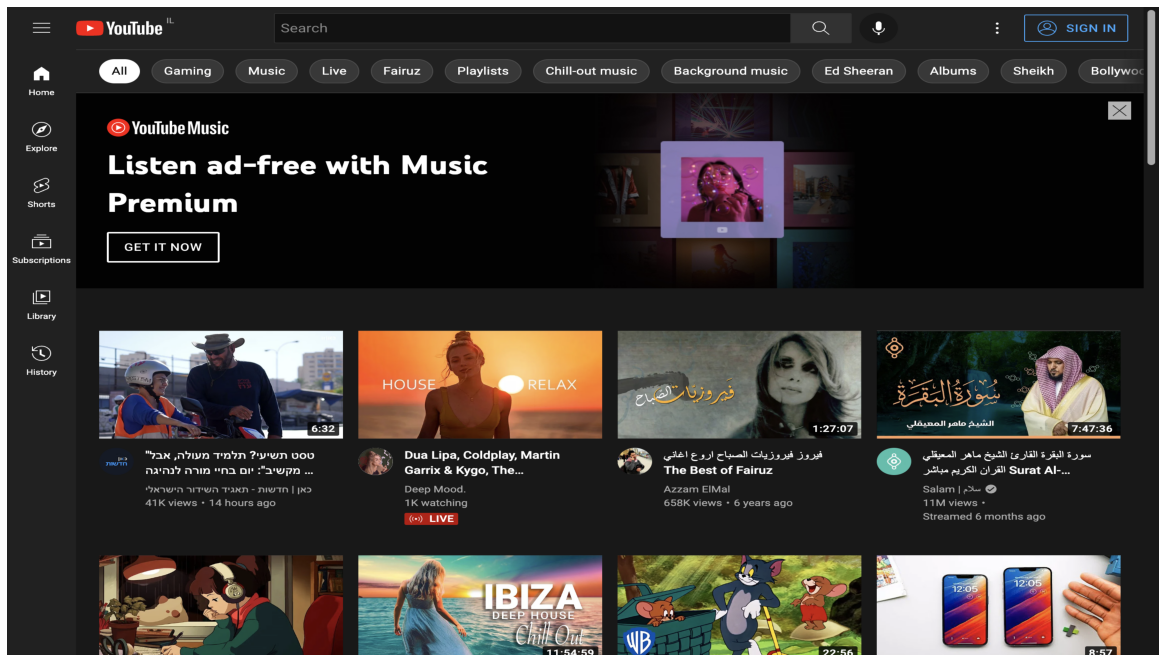

In [18]:
show_screen(driver)

In [19]:
import pytesseract
pytesseract.image_to_string(Image.open('image.png'))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.